# <font color="blue">Data Science Academy</font>

### <font color="blue">Processo de Construção, Treinamento, Avaliação e Seleção de Modelos Para Classificação</font>

In [1]:
# Imports
import joblib
import pickle
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, accuracy_score, f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Customização dos gráficos
sns.set_palette("deep")
sns.set_style("ticks")

mpl.rc("axes", labelsize=12, titlesize=14)
mpl.rc("figure", figsize=(8, 4))

title_style = dict(fontweight="heavy", fontfamily="arial")
scatter_style = dict(linewidth=0.3, edgecolor="k", alpha=0.85)

## Carregando o Conjunto de dados

In [3]:
# Carrega os dados
dados = pd.read_csv("dados/dataset.csv")

In [4]:
# Shape
dados.shape

(583, 11)

In [5]:
# Colunas
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [6]:
# Amostra dos dados
dados.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
324,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00,1
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
163,39,Male,1.9,0.9,180,42,62,7.4,4.3,1.38,1
184,64,Male,1.1,0.4,201,18,19,6.9,4.1,1.40,1
395,45,Male,0.8,0.2,140,24,20,6.3,3.2,1.00,2
427,65,Male,0.9,0.2,170,33,66,7.0,3.0,0.75,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
343,70,Male,3.1,1.6,198,40,28,5.6,2.0,0.50,1
544,54,Female,5.5,3.2,350,67,42,7.0,3.2,0.80,1
46,21,Male,3.9,1.8,150,36,27,6.8,3.9,1.34,1


## Análise Exploratória de Dados

In [7]:
# Tipos de dados
dados.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

### Exploração das Variáveis Numéricas

In [8]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [9]:
# Renomear a coluna Total_Protiens
dados.rename({"Total_Protiens": "Total_Proteins"}, axis=1, inplace=True)

# Variáveis categóricas e numéricas
cats = dados.select_dtypes(include="object").columns.tolist()
nums = dados.drop("Dataset", axis=1).select_dtypes(exclude="object").columns.tolist()

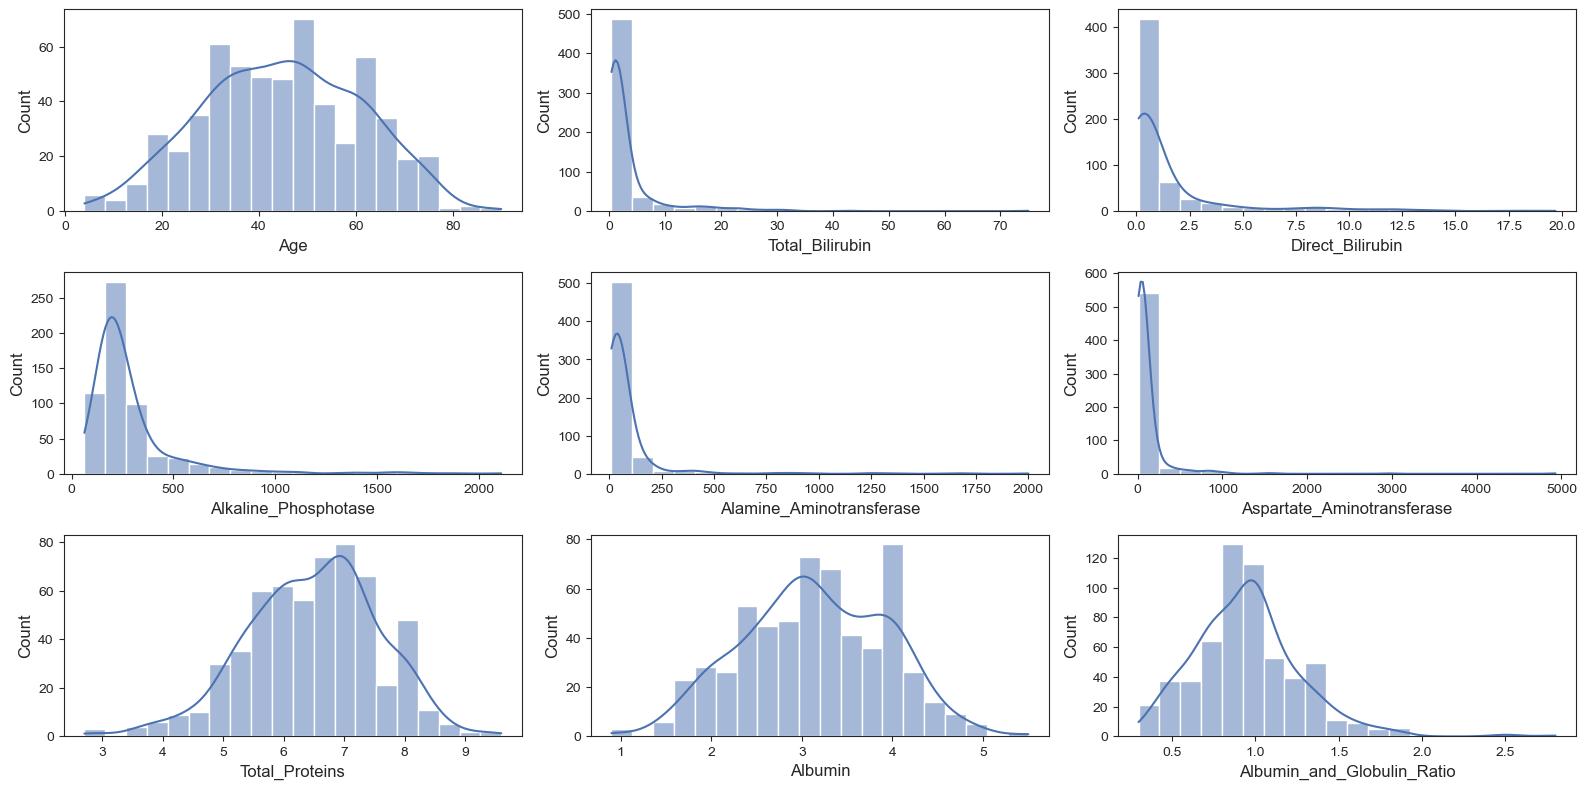

In [10]:
# Plot 
fig = plt.figure(figsize=(16,8)) 

for i, col in enumerate(nums):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=dados, x=col, kde=True, bins=20)
    
fig.tight_layout()
plt.show()

Parece que há outlier nas variáveis **Alamine_Aminotransferase**, **Aspartate_Aminotransferase**, pois o valor máximo é muito mais alto que o valor médio.

A coluna dataset (variável target) tem "1" para doença hepática e "2" para nenhuma doença hepática. Vamos ajustar a variável colocando valores mais fáceis de interpretar. A classe negativa (não tem a doença) será zero.

In [11]:
# Substitui 2 por 0
dados["Dataset"].replace(2, 0, inplace=True)

In [12]:
# Vamos ajustar o nome da variável target
dados.rename({"Dataset": "Target"}, axis=1, inplace=True)

In [13]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
545,45,Female,0.7,0.2,153,41,42,4.5,2.2,0.9,0
70,19,Female,0.7,0.2,186,166,397,5.5,3.0,1.2,1
277,60,Male,2.0,0.8,190,45,40,6.0,2.8,0.8,1
347,38,Male,0.7,0.2,216,349,105,7.0,3.5,1.0,1
333,36,Female,0.7,0.2,152,21,25,5.9,3.1,1.1,0


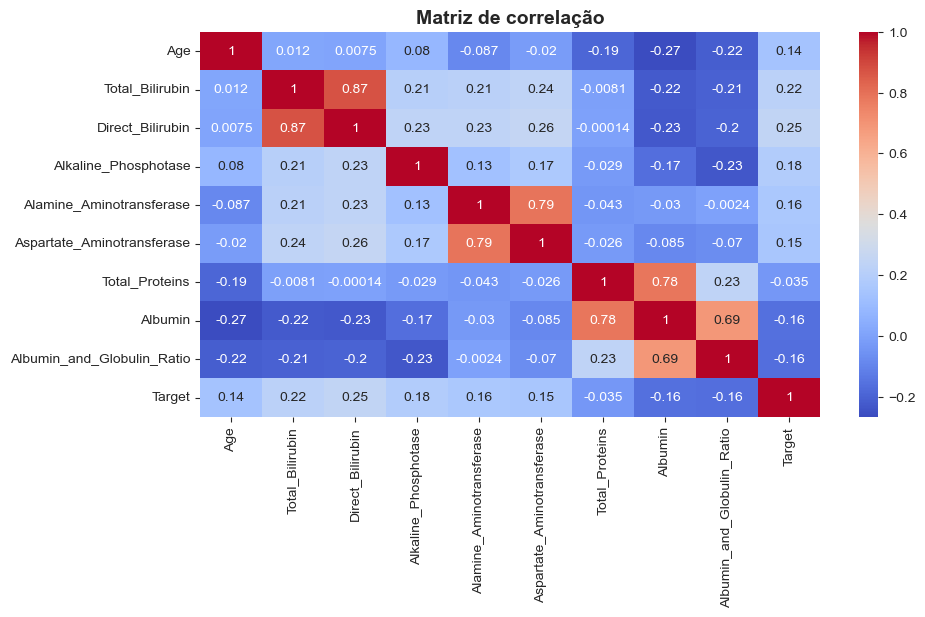

In [14]:
# Correlação entre as variáveis
plt.figure(figsize=(10,5))
sns.heatmap(dados.corr(), annot=True, fmt=".2g", cmap="coolwarm")
plt.title("Matriz de correlação", **title_style)

plt.show()

### Exploração da Variável Categórica

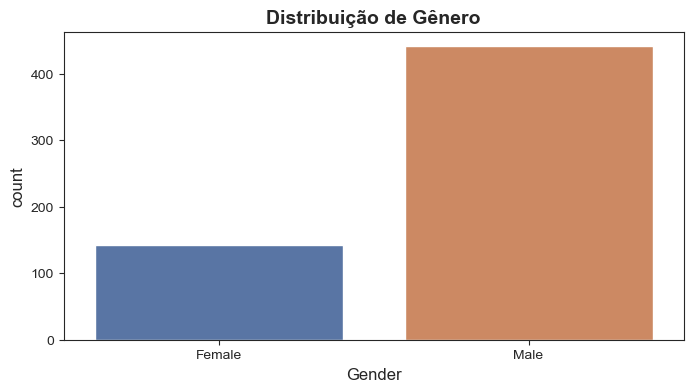

In [15]:
# Plot
sns.countplot(data=dados, x="Gender")
plt.title("Distribuição de Gênero", **title_style)

plt.show()

In [16]:
# Value counts
dados["Gender"].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

Vamos aproveitar e já transformar a variável categórica em sua representação numérica usando label encoding. Além de reduzir o trabalho mais tarde, facilitará a criação de gráficos a seguir.

In [17]:
# Mapeia os gêneros
dados["Gender"] = dados["Gender"].map({"Male": 0, "Female": 1})

In [18]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
551,29,0,1.2,0.4,160,20,22,6.2,3.0,0.9,0
349,49,1,0.8,0.2,158,19,15,6.6,3.6,1.2,0
573,32,0,3.7,1.6,612,50,88,6.2,1.9,0.4,1
529,55,0,3.3,1.5,214,54,152,5.1,1.8,0.5,1
217,49,0,1.1,0.5,159,30,31,7.0,4.3,1.5,1


### Verificando o Target

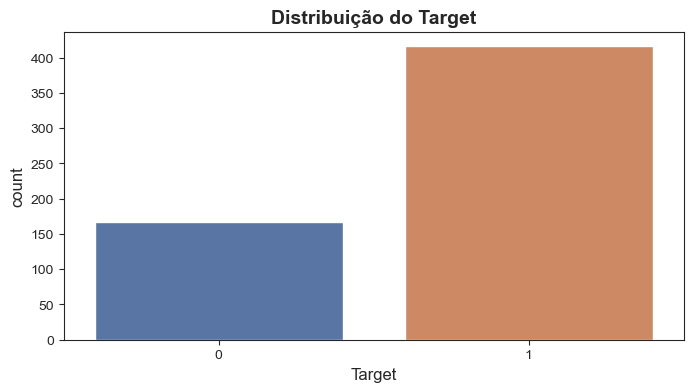

In [19]:
# Plot
sns.countplot(data=dados, x="Target")
plt.title("Distribuição do Target", **title_style)

plt.show()

Há um claro desbalanceamento de classes neste dataset, com muito mais casos de doença hepática que pessoas saudáveis. Precisamos corrigir isso durante o pré-processamento.

### Verificando a Relação Entre Atributos

In [20]:
gender_colors = ["#9d4edd", "#e9c46a"]

def plot_scatter(x: str, y: str, hue1="Target", hue2="Gender"):
    fig = plt.figure(figsize=(16,4))
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=dados, x=x, y=y, hue=hue1, **scatter_style)
    plt.title(f"{x} vs. {y} por {hue1}", **title_style)
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=dados, x=x, y=y, hue=hue2, palette=gender_colors, **scatter_style)
    plt.title(f"{x} vs. {y} por {hue2}", **title_style)
    
    fig.tight_layout()
    plt.show()

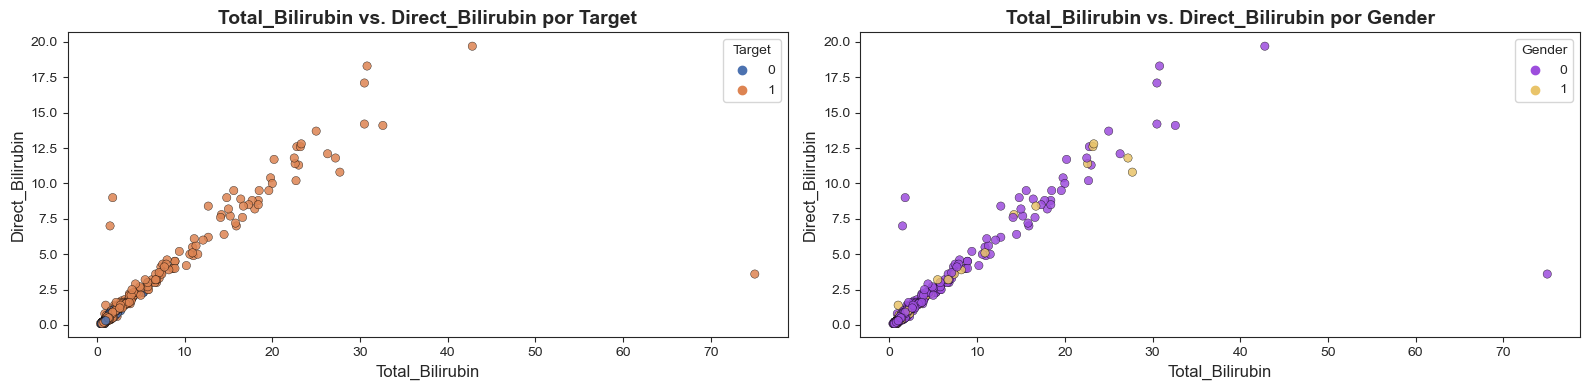

In [21]:
plot_scatter("Total_Bilirubin", "Direct_Bilirubin")

Conforme visto na matriz de correlação, há uma correlação forte entre __Total_Bilirubin__ e __Direct_Bilirubin__. Podemos remover uma das colunas.

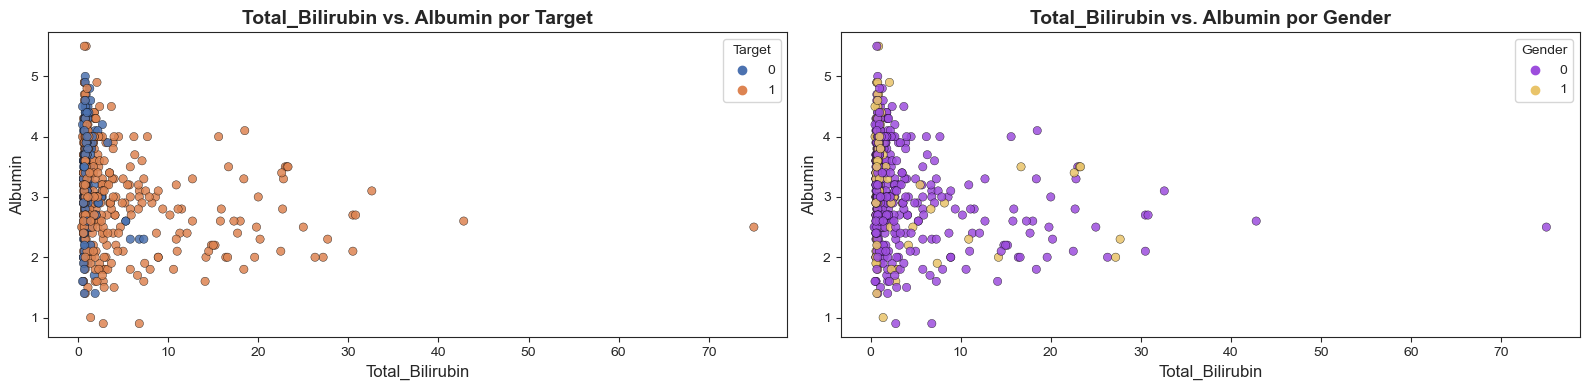

In [22]:
plot_scatter("Total_Bilirubin", "Albumin")

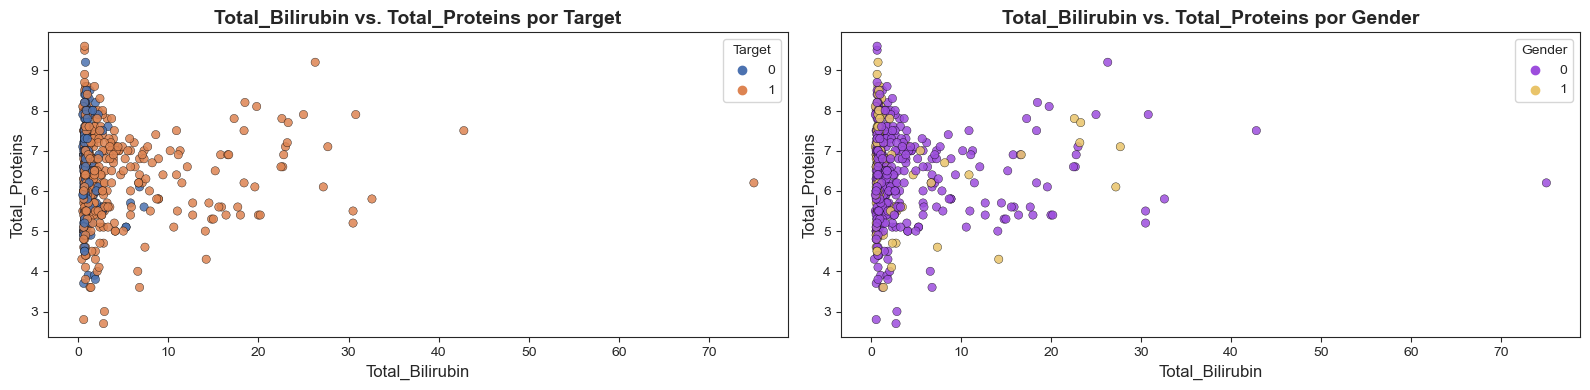

In [23]:
plot_scatter("Total_Bilirubin", "Total_Proteins")

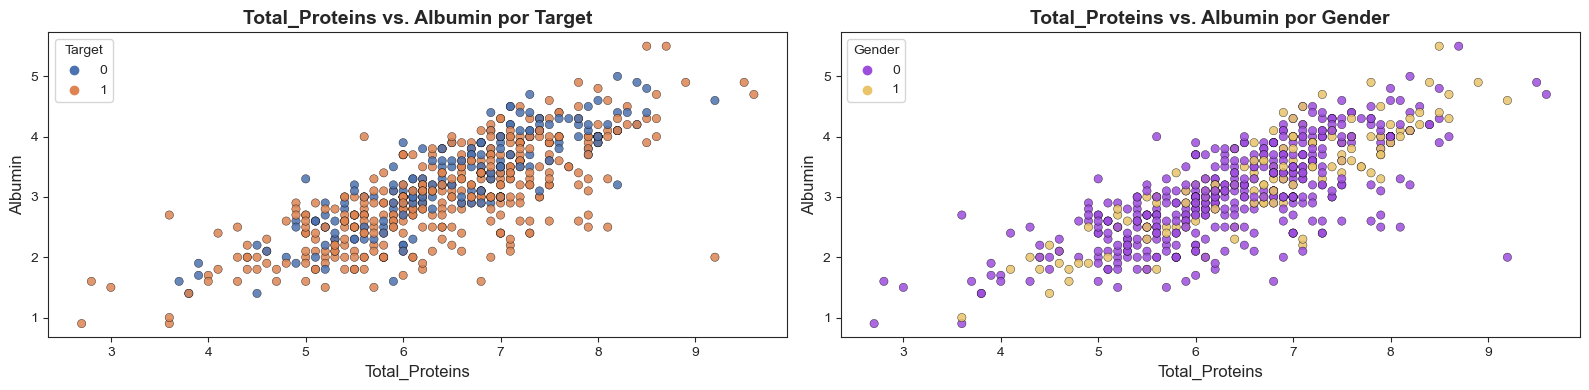

In [24]:
plot_scatter("Total_Proteins", "Albumin")

Há uma forte correlação entre __Total_Proteins__ e __Albumin__ também, mas, neste caso, faz sentido manter as duas colunas.

### Verificando Valores Ausentes e Registros Duplicados

In [25]:
# Verificando valores ausentes
dados.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [26]:
# Verificando registros duplicados (complete cases)
# Complete cases também se refere a linhas onde não há valores ausentes
print("Número de duplicados:", dados.duplicated().sum())
print("")
dados[dados.duplicated(keep = False)]

Número de duplicados: 13



,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


## Limpeza de Dados

### Tratamento de Registros Duplicados

In [27]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()
print(dados.shape)

(570, 11)


### Tratamento de Outliers

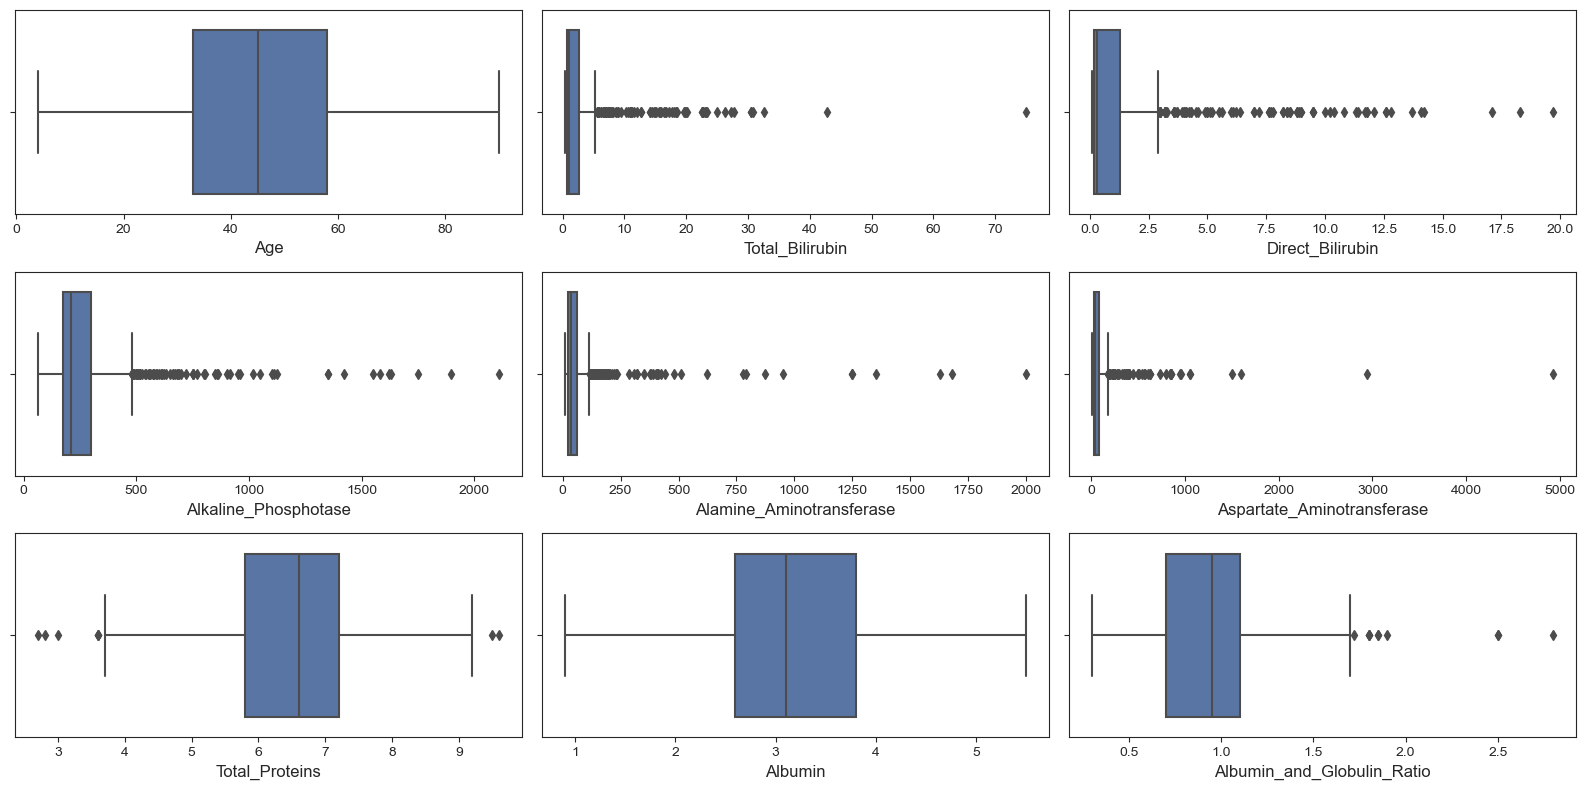

In [28]:
# Boxplot
fig = plt.figure(figsize=(16,8)) 

for i, col in enumerate(nums):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=dados, x=col)
    
fig.tight_layout()
plt.show()

Algumas colunas têm muitos outliers. Podemos remover os mais críticos.

In [29]:
# Filtros
filt1 = dados["Aspartate_Aminotransferase"] <= 2000
filt2 = dados["Total_Bilirubin"] <= 40
filt3 = dados["Alamine_Aminotransferase"] <= 1000

# Remove outliers
dados = dados.loc[(filt1) & (filt2) & (filt3)]
dados.shape

(562, 11)

In [30]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,562.0,44.923488,16.273164,4.0,33.0,45.00,58.0,90.0
Gender,562.0,0.249110,0.432883,0.0,0.0,0.00,0.0,1.0
Total_Bilirubin,562.0,3.043416,5.183963,0.4,0.8,1.00,2.4,32.6
Direct_Bilirubin,562.0,1.423488,2.706963,0.1,0.2,0.30,1.2,18.3
Alkaline_Phosphotase,562.0,290.434164,244.503368,63.0,175.0,207.00,298.0,2110.0
Alamine_Aminotransferase,562.0,64.359431,99.907545,10.0,23.0,34.00,60.0,950.0
Aspartate_Aminotransferase,562.0,88.626335,147.741654,10.0,25.0,41.00,83.0,1500.0
Total_Proteins,562.0,6.500712,1.090291,2.7,5.8,6.60,7.2,9.6
Albumin,562.0,3.152847,0.799599,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,558.0,0.948513,0.319575,0.3,0.7,0.95,1.1,2.8


### Tratamento de Valores Ausentes

In [31]:
# Lista com os valores ausentes
dados[dados.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [32]:
# Colunas com valores ausentes
na_cols = dados.columns[dados.isna().any()].tolist()

# Preenche os valores ausentes com o KNNImputer
imputer = KNNImputer()
df_imp = pd.DataFrame(imputer.fit_transform(dados[na_cols]), columns=na_cols)
dados = dados.fillna(df_imp)

In [33]:
# Lista os valores ausentes
dados.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

## Pré-Processamento de Dados

Dada a alta correlação entre as variáveis __Direct_Bilirubin__ e __Total_Bilirubin__ e o fato de representarem basicamente a mesma coisa, vamos remover __Direct_Bilirubin__.

In [34]:
dados = dados.drop("Direct_Bilirubin", axis=1)
dados.shape

(562, 10)

### Divisão em Treino e Teste

In [35]:
dados.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,195,27,59,7.3,2.4,0.40,1


In [36]:
# Separa em X e y
y = dados["Target"]
X = dados.drop("Target", axis=1)

In [37]:
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=42, stratify=dados["Target"])

In [38]:
# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(421, 9) (141, 9) (421,) (141,)


### Balanceamento de Classe

In [39]:
# Carrega a função SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

In [40]:
# Vamos aplicar a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors=2)

O balanceamento é feito apenas nos dados de treino porque não há necessidade de balancear os dados de teste. O mais importante aqui é que o modelo não favoreça uma classe em detrimento da outra durante o treinamento.

In [41]:
# Aplica o oversampling (deve ser feito somente com dados de treino)
X_res, y_res = over_sampler.fit_resample(X_treino, y_treino)

In [42]:
y_res.value_counts()

1    298
0    298
Name: Target, dtype: int64

In [43]:
# Ajusta o nome do dataset de treino para y
y = y_res

### Padronização dos Dados

In [44]:
# Padronização
scaler = StandardScaler()
X = scaler.fit_transform(X_res)
X_teste = scaler.transform(X_teste)

###  Construção, Treinamento e Avaliação dos algoritmos

Vamos usar uma validação cruzada para avaliar vários algoritmos ao mesmo tempo. A partir dos resultados, escolheremos o melhor para tunagem de hiperparâmetros.

In [45]:
# Dicionário com os algoritmos
modelos = {
    "LogisticRegression": LogisticRegression(random_state=42), 
    "SVM": SVC(random_state=42),
    "KNeighbors": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42)
}

# DataFrame para salvar as feature_importance_
importances = modelos.copy()

# DataFrame para salvar os resultados
resultados = pd.DataFrame(index=modelos.keys(), columns=["Acurácia", "ROC_AUC Score", "AUC Score", "Tempo (s)"], data=np.nan)

In [46]:
# def cross_validation(X: np.array, y: pd.Series, modelo: str, n_folds=10):
#     # Listas vazias para salvar os resultados
#     acuracia_lista = []
#     roc_auc_lista = []
#     f1_score_lista = []
    
#     # Inicia a contagem
#     t0 = time.time()
    
#     # Cross validation com n_folds
#     kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    
#     for fold, (treino_idx, val_idx) in enumerate(kfold.split(X, y)):
#         # Subsets de treino e validação
#         X_treino, X_val = X[treino_idx], X[val_idx]
#         y_treino, y_val = y[treino_idx], y[val_idx]
        
#         # Treina o algoritmo e salva o resultado nas listas
#         clf = modelos[modelo]
#         clf.fit(X_treino, y_treino)
#         y_pred = clf.predict(X_val)
        
#         acuracia_lista.append(accuracy_score(y_val, y_pred))
#         roc_auc_lista.append(roc_auc_score(y_val, y_pred))
#         f1_score_lista.append(f1_score(y_val, y_pred))
        
#     # Salva o modelo treinado
#     importances[modelo] = clf
    
#     # Tira a média e salva no DataFrame
#     resultados.loc[modelo][0] = np.mean(acuracia_lista)
#     resultados.loc[modelo][1] = np.mean(roc_auc_lista)
#     resultados.loc[modelo][2] = np.mean(f1_score_lista)
    
#     # Para a contagem
#     t1 = time.time()
#     resultados.loc[modelo][3] = np.round(t1 - t0, 2)
    
#     # Printa o tempo de treinamento
#     print(f"{modelo}:", np.round(t1 - t0, 2), "s")

In [47]:
i = 0
n_folds = 10

print("Tempo de treinamento")
print(30 * "-")

for key, modelo in modelos.items():
    
    # Listas vazias para salvar os resultados
    acuracia_lista = []
    roc_auc_lista = []
    f1_score_lista = []
    
    # Inicia a contagem
    t0 = time.time()
    
    # Cross validation com 10 folds
    kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    for fold, (treino_idx, val_idx) in enumerate(kfold.split(X, y)):
        # Subsets de treino e validação
        X_treino, X_val = X[treino_idx], X[val_idx]
        y_treino, y_val = y[treino_idx], y[val_idx]
        
        # Treina o algoritmo e salva o resultado nas listas
        clf = modelo
        clf.fit(X_treino, y_treino)
        y_pred = clf.predict(X_val)
        
        acuracia_lista.append(accuracy_score(y_val, y_pred))
        roc_auc_lista.append(roc_auc_score(y_val, y_pred))
        f1_score_lista.append(f1_score(y_val, y_pred))
        
        # Salva o modelo treinado
        importances[key] = clf
    
    # Tira a média e salva no DataFrame
    resultados.iloc[i, 0] = np.mean(acuracia_lista)
    resultados.iloc[i, 1] = np.mean(roc_auc_lista)
    resultados.iloc[i, 2] = np.mean(f1_score_lista)
    
    # Para a contagem
    t1 = time.time()
    resultados.iloc[i, 3] = np.round(t1 - t0, 2)
    i += 1
    
    # Printa o tempo de treinamento
    print(f"{key}:", np.round(t1 - t0, 2), "s")

Tempo de treinamento
------------------------------
LogisticRegression: 0.08 s
SVM: 0.14 s
KNeighbors: 0.08 s
DecisionTree: 0.07 s
RandomForest: 1.61 s


In [48]:
resultados

,Acurácia,ROC_AUC Score,AUC Score,Tempo (s)
LogisticRegression,0.717966,0.717989,0.670983,0.08
SVM,0.724859,0.725000,0.662680,0.14
KNeighbors,0.684605,0.684885,0.642304,0.08
DecisionTree,0.721328,0.721552,0.710436,0.07
RandomForest,0.815339,0.815287,0.802301,1.61


O modelo RandomForest apresentou o melhor resultado dentre os testados. Podemos levá-lo para a tunagem de parâmetros.

Vamos aproveitar para olhar a <code>feature_importances_</code> de cada modelo (se disponível).

In [49]:
importances_df = pd.DataFrame(columns=["Features", "DecisionTree", "RandomForest"])
importances_df["Features"] = dados.drop("Target", axis=1).columns
importances_df["DecisionTree"] = importances["DecisionTree"].feature_importances_
importances_df["RandomForest"] = importances["RandomForest"].feature_importances_
importances_df

,Features,DecisionTree,RandomForest
0,Age,0.126726,0.129348
1,Gender,0.000000,0.014464
2,Total_Bilirubin,0.278451,0.166087
3,Alkaline_Phosphotase,0.140735,0.172513
4,Alamine_Aminotransferase,0.185764,0.132758
5,Aspartate_Aminotransferase,0.120024,0.144283
6,Total_Proteins,0.051804,0.069162
7,Albumin,0.042552,0.076246
8,Albumin_and_Globulin_Ratio,0.053945,0.095138


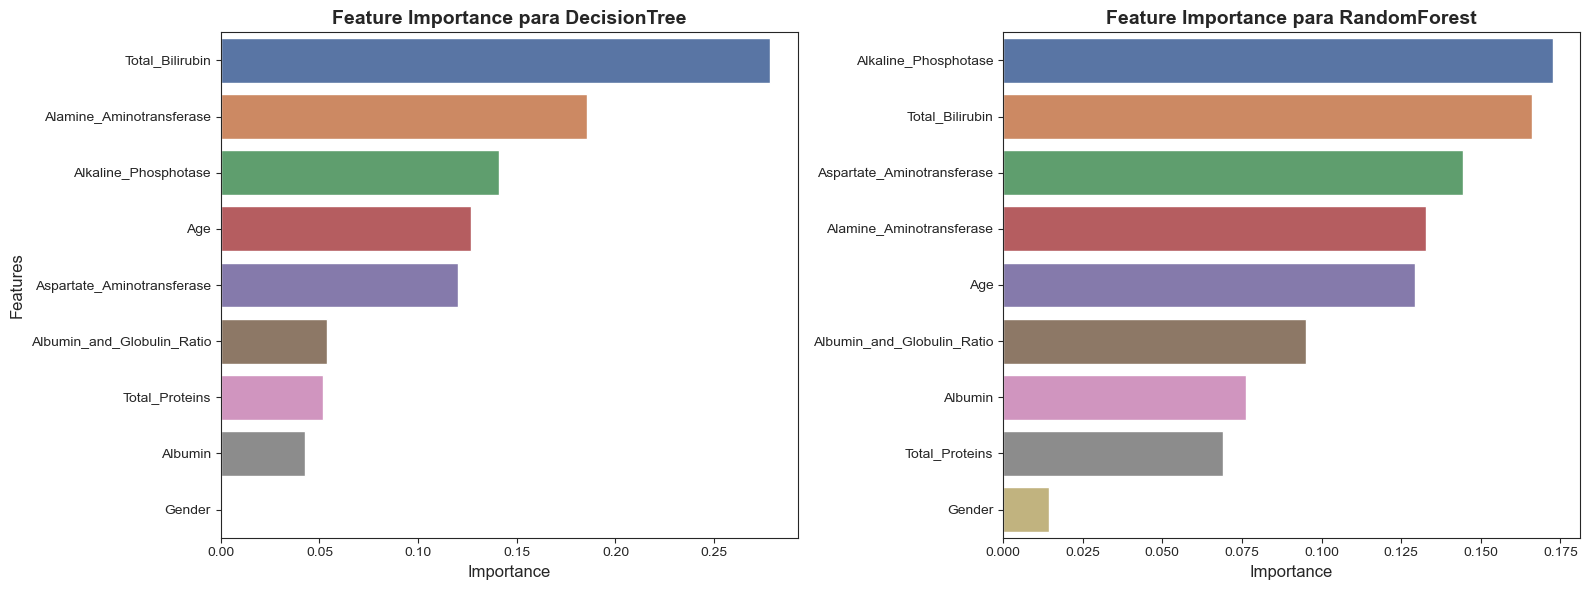

In [50]:
# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

sns.barplot(data=importances_df.sort_values("DecisionTree", ascending=False), x="DecisionTree", y="Features", ax=ax1)
ax1.set_title("Feature Importance para DecisionTree", **title_style)
ax1.set_xlabel("Importance")

sns.barplot(data=importances_df.sort_values("RandomForest", ascending=False), x="RandomForest", y="Features", ax=ax2)
ax2.set_title("Feature Importance para RandomForest", **title_style)
ax2.set_xlabel("Importance")
ax2.set_ylabel("")

fig.tight_layout()
plt.show()

Podemos ver pelos gráficos que as features mais importantes são parecidas para ambos os modelos. __Gender__, por outro lado, poderia até mesmo ser descartado, visto que não apresenta uma importância significativa.

### Tunagem de Hiperparâmetros

In [51]:
# Grid de hiperparâmetros
grid_params = {"n_estimators": [100, 200, 300, 400, 500], 
               "min_samples_split": [2, 5, 10], 
               "min_samples_leaf": [1, 2, 4],
               "criterion": ["gini", "entropy"]}

In [52]:
# Seleção de hiperparâmetros
grid_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), grid_params, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_params

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'criterion': 'gini'}

In [53]:
# Cria o modelo com os melhores hiperparâmetros
forest = RandomForestClassifier(random_state=42, **best_params)

# Treina o modelo
forest.fit(X, y)

# Previsões em teste
y_pred = forest.predict(X_teste)

# Obtém as previsões para a classe positiva
y_pred_proba = forest.predict_proba(X_teste)[:,1]

              precision    recall  f1-score   support

           0       0.41      0.54      0.46        41
           1       0.78      0.68      0.73       100

    accuracy                           0.64       141
   macro avg       0.59      0.61      0.60       141
weighted avg       0.67      0.64      0.65       141



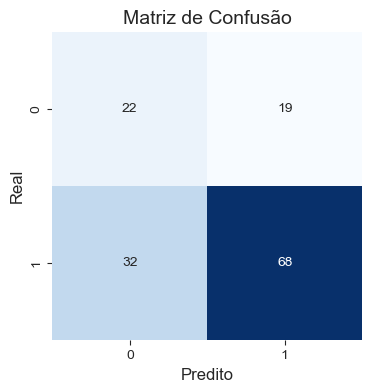

In [54]:
# Matriz de Confusão
cm = confusion_matrix(y_teste, y_pred)

print(classification_report(y_teste, y_pred))

# Plot Matriz de Confusão
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")

plt.show()

O modelo consegue prever bem se uma pessoa terá uma doença hepática, mas deixa a desejar na previsão de pessoas saudáveis.

In [55]:
def metricas(teste, pred, pred_proba):
    acuracia = np.round(accuracy_score(teste, pred), 3)
    f1 = np.round(f1_score(teste, pred), 3)
    roc_auc = np.round(roc_auc_score(teste, pred), 3)
    fpr, tpr, thresholds = roc_curve(teste, pred_proba)
    auc_score = np.round(auc(fpr, tpr), 3)
    print("Avaliação do modelo")
    print("-"*25)
    print("Acurácia:", acuracia)
    print("F1 Score:", f1)
    print("ROC_AUC Score:", roc_auc)
    print("AUC Score:", auc_score)
    
metricas(y_teste, y_pred, y_pred_proba)

Avaliação do modelo
-------------------------
Acurácia: 0.638
F1 Score: 0.727
ROC_AUC Score: 0.608
AUC Score: 0.684


## Previsões com o Melhor Modelo Treinado

In [56]:
# Salva o modelo em disco
with open("modelos/forest.pkl", "wb") as pickle_file:
      joblib.dump(forest, "modelos/forest.pkl") 

In [57]:
# Carregamos o melhor modelo do disco
melhor_modelo = joblib.load("modelos/forest.pkl")
melhor_modelo

RandomForestClassifier(n_estimators=400, random_state=42)

In [58]:
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Proteins', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [59]:
# Dados brutos de um novo paciente
# O número de colunas deve ser o mesmo do que foi usado em treino
novo_paciente = [72, 1, 0.8, 186, 15, 29, 7.1, 3.4, 0.97]

In [60]:
# Converte o objeto para array
arr_paciente = np.array(novo_paciente)

In [61]:
# Padronização dos novos dados
arr_paciente = scaler.transform(arr_paciente.reshape(1, -1))

In [62]:
# Converte o objeto para array
arr_paciente = np.array(arr_paciente)

In [63]:
# Dados do paciente padronizados (exatamente como o modelo espera receber os dados)
arr_paciente

array([[ 1.68255894,  1.95101297, -0.37243384, -0.38144698, -0.49257766,
        -0.34166622,  0.59559411,  0.28501207,  0.02212742]])

In [64]:
# Previsões de classe
pred_novo_paciente = melhor_modelo.predict(arr_paciente.reshape(1, -1))

In [65]:
# Verifica o valor e imprime o resultado final
if pred_novo_paciente == 1:
    print("Este paciente deve apresentar doença hepática!")
else:
    print("Este paciente não deve apresentar doença hepática!")

Este paciente deve apresentar doença hepática!


# Fim